Load the Data adn Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

Understanding the data 

In [3]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


should have printed df info

In [4]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [5]:
df.describe(include=['O'])

,Gender,Location,Subscription_Start_Date,Subscription_Type,Payment_Method,Favorite_Genre,Devices_Used,Date_of_Churn,Reason_for_Churn
count,1000,1000,1000,1000,1000,1000,1000,246,246
unique,3,5,1000,3,3,5,4,246,4
top,Other,West,2020-06-07 01:53:37.656934,Standard,Credit Card,Drama,Mobile,2021-06-13 01:53:37.657108,Price increase
freq,336,216,1,530,613,212,408,1,68


Data Cleaning 

In [7]:
# Convert relevant columns to datetime
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn'])
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])

In [10]:
# Add a tenure column
df['Tenure'] = (df['Date_of_Churn'] - df['Subscription_Start_Date']).dt.days

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User_ID                  1000 non-null   int64         
 1   Age                      1000 non-null   int64         
 2   Gender                   1000 non-null   object        
 3   Location                 1000 non-null   object        
 4   Subscription_Start_Date  1000 non-null   datetime64[ns]
 5   Subscription_Type        1000 non-null   object        
 6   Monthly_Payment          1000 non-null   float64       
 7   Payment_Method           1000 non-null   object        
 8   Monthly_Hours_Watched    1000 non-null   float64       
 9   Favorite_Genre           1000 non-null   object        
 10  Devices_Used             1000 non-null   object        
 11  Average_Session_Length   1000 non-null   float64       
 12  Content_ID               1000 non-n

Exploratory Data Analysis (EDA):

In [15]:
#heatmap numerical
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'datetime64[ns]']).columns
correlation = df[numeric_columns].corr()['Churned'].sort_values(ascending=False)
print(correlation)

Churned                    1.000000
Date_of_Churn              0.999988
Content_ID                 0.024253
User_ID                    0.009620
Average_Session_Length     0.008055
Monthly_Payment           -0.013059
Subscription_Start_Date   -0.034501
Age                       -0.045139
Monthly_Hours_Watched     -0.060233
Rating_Given              -0.175378
Tenure                          NaN
Name: Churned, dtype: float64


<Axes: >

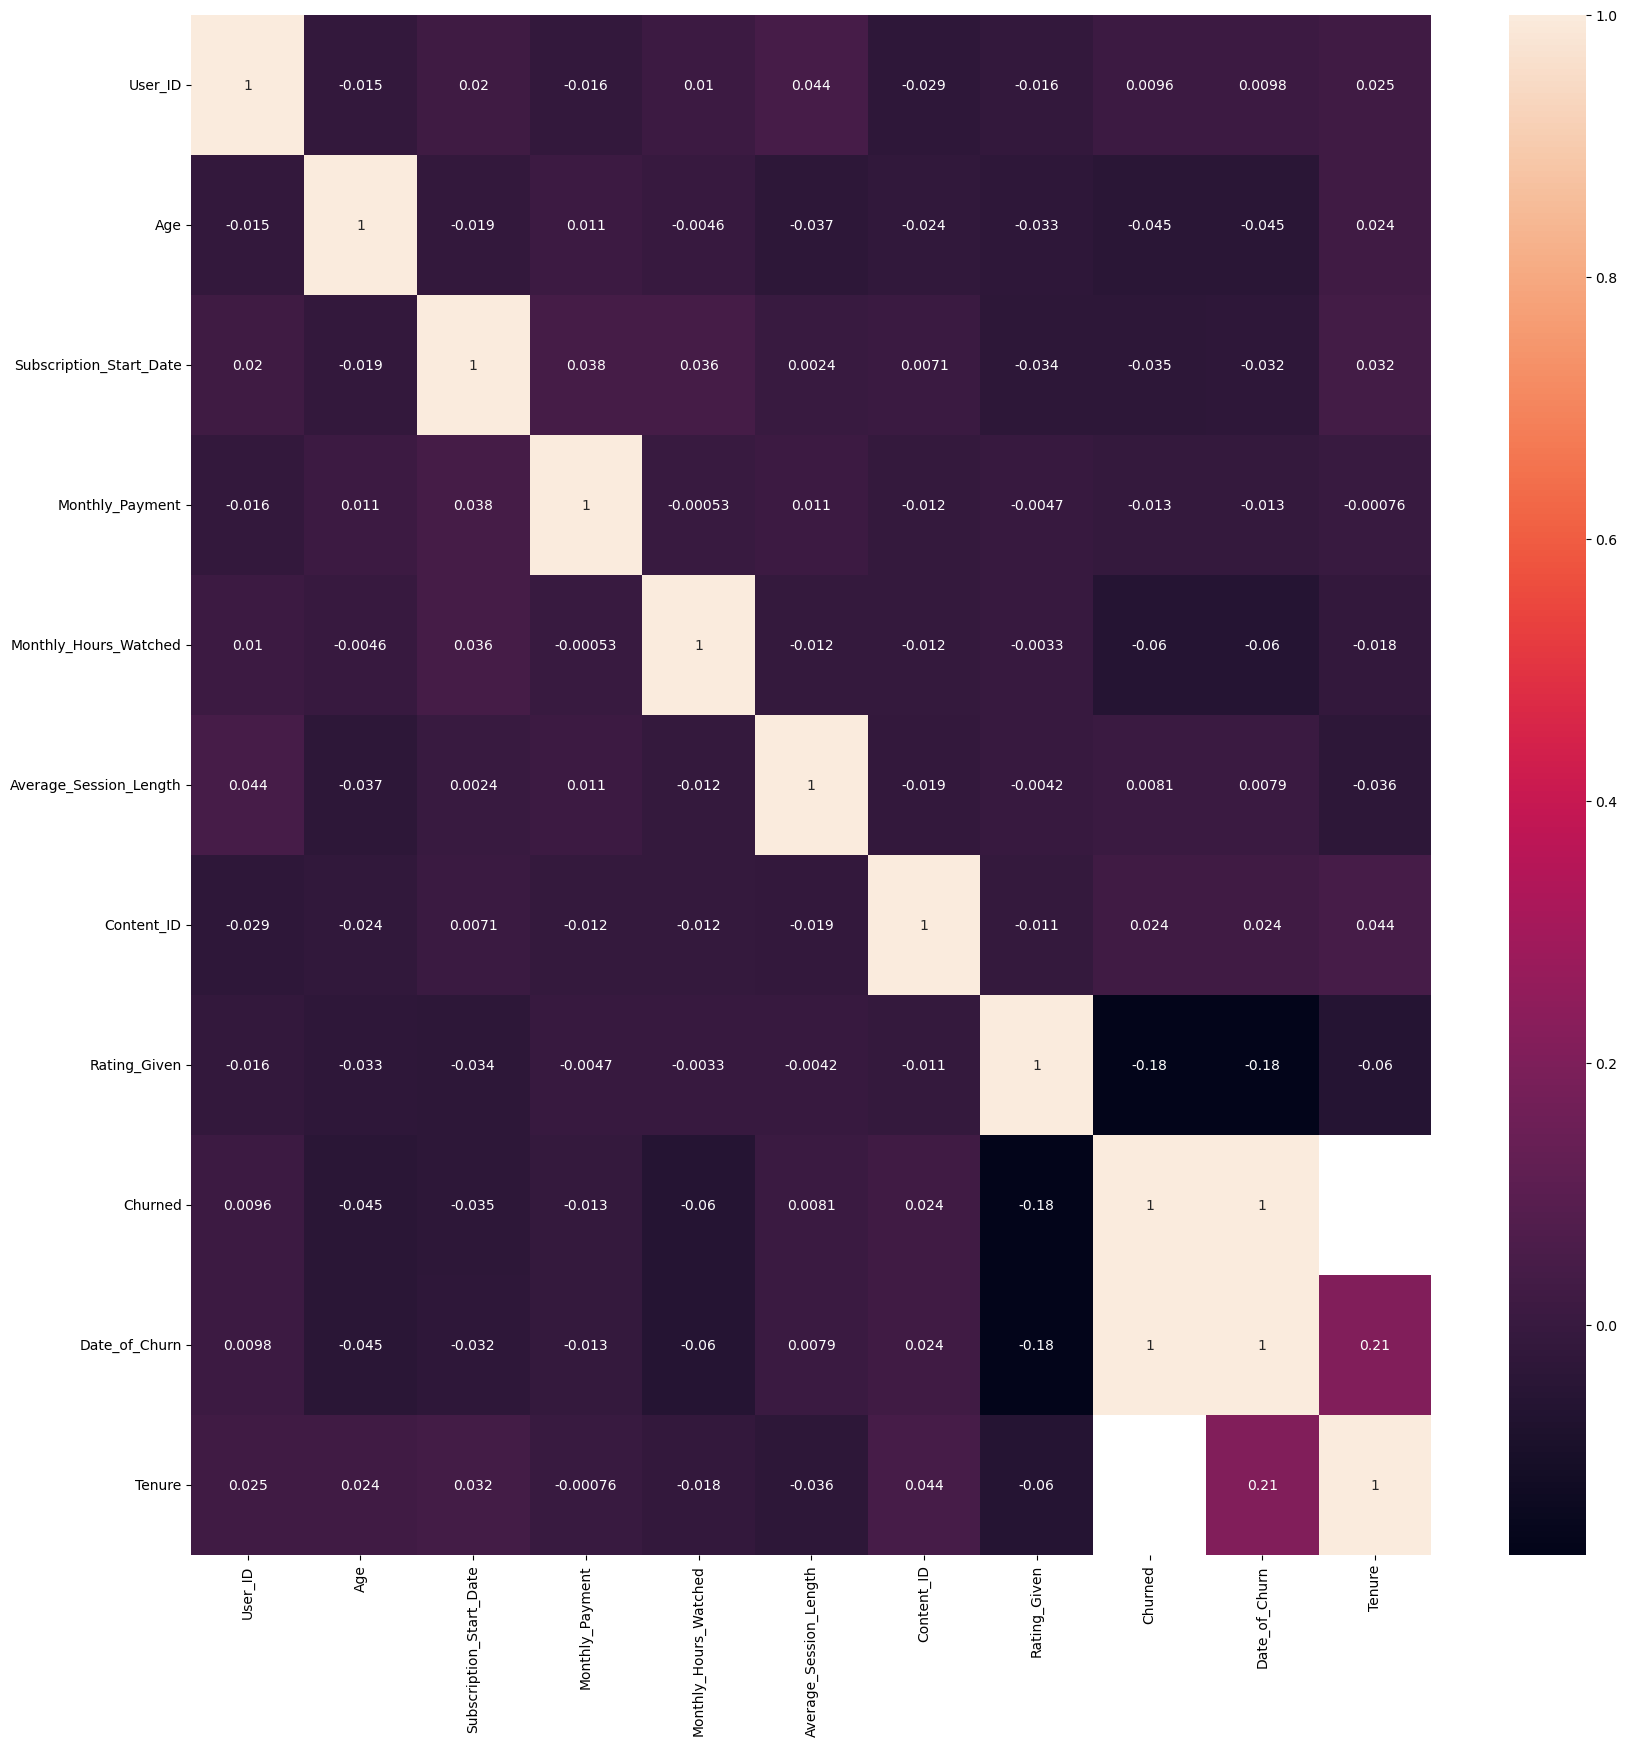

In [16]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize = (20,20))
sns.heatmap(df[numeric_columns].corr(), annot=True)

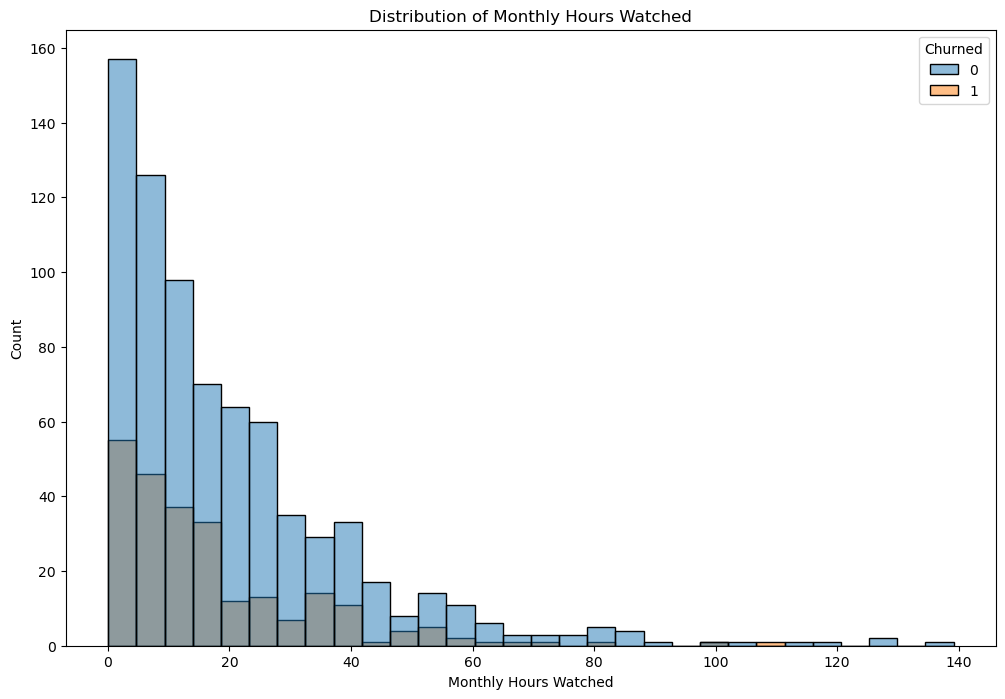

In [36]:
#Visualization: Distribution of Monthly Hours Watched
plt.figure(figsize=(12, 8))
sns.histplot( data=df, x='Monthly_Hours_Watched', hue='Churned',bins=30,)
plt.title('Distribution of Monthly Hours Watched')
plt.xlabel('Monthly Hours Watched')
plt.ylabel('Count')
plt.show()

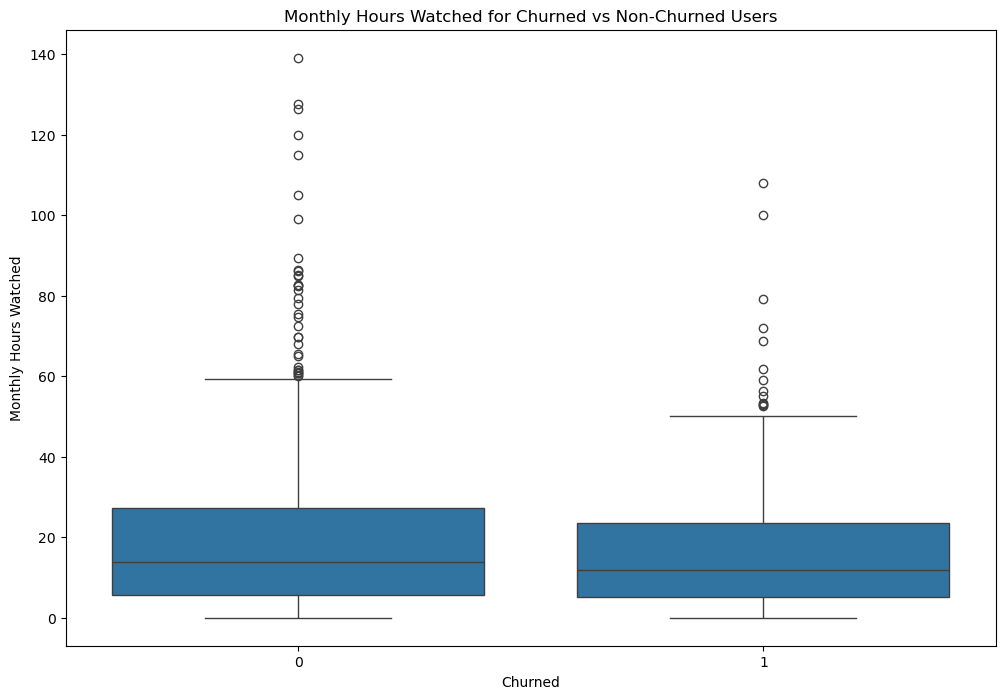

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Churned', y='Monthly_Hours_Watched', data=df,)
plt.title('Monthly Hours Watched for Churned vs Non-Churned Users')
plt.xlabel('Churned')
plt.ylabel('Monthly Hours Watched')
plt.show()

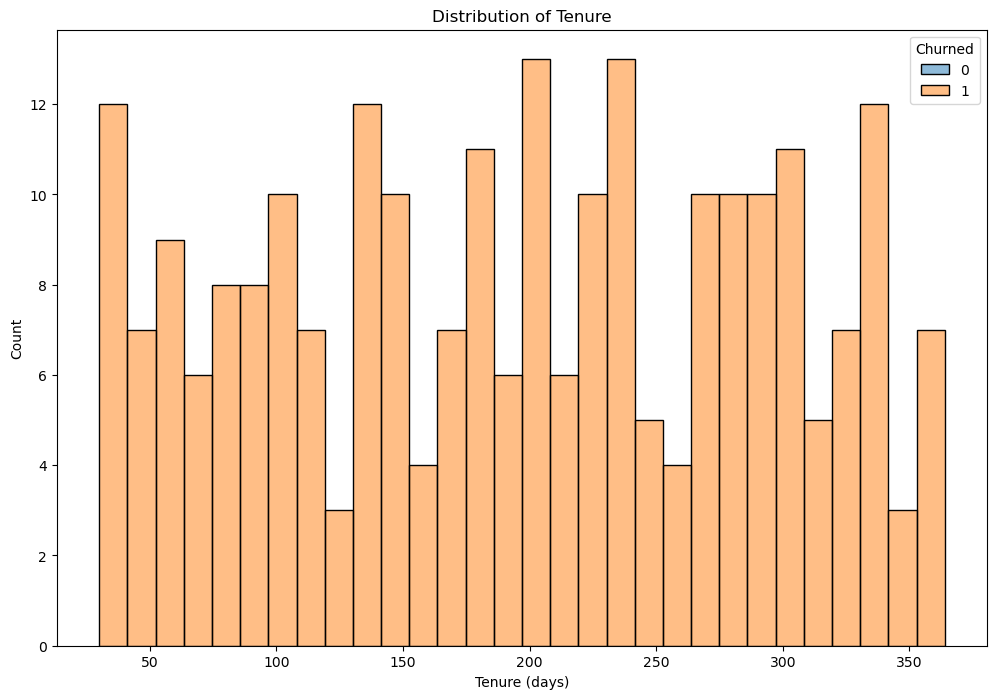

In [41]:
# Visualization: Distribution of Tenure for churned vs non-churned users
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Tenure', hue='Churned', bins=30,)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (days)')
plt.ylabel('Count')
plt.show()